# Introducción a los métodos de regresión
<hr />
##### Aqui estudiamos un conjunto de métodos que buscan ajustar un modelo a un cierto conjunto de datos, en este sentido entendemos "ajuste" por algo aproximado, donde el modelo no necesariamente reproduce los datos de forma exacta como sucede con las técnicas de interpolacion. Consideramos un conjunto de datos: 

\begin{equation}
data = \left((x_0,y_0),(x_1,y_1),\ldots,(x_n,y_n)\right),
\end{equation}
##### y tomamos el caso de ajustar un modelo lineal. Por lo tanto, buscaremos un modelo cuya ecuacion este dada por:

\begin{equation}
y = f(x) = a_0 +a_1 x
\end{equation}
##### Un cierto modelo lineal no puede en general pasar por todos los puntos del conjunto de datos, en ese sentido tendriamos algo como lo que se muestra a continuación:
<img src="figuras_mv/ajuste.png" alt="Alt text that describes the graphic" title="Title text" />

##### vemos que para cada dato hay una diferencia entre su valor actual $y_i$ y el valor que predice el modelo $f(x_i)$, y a esta diferencia nos referimos con el error del modelo respecto al punto $(x_i,y_i)$. En este sentido,  el objetivo de un método de regresion es minimizar este error respecto de todos los puntos del conjunto de datos. En esta introduccion construiremos un modelo de regresion considerando el error cuadratico total, el cual está dado por:

\begin{equation}
E_c = \sum_{i=0}^n (y_i-f(x_i))^2
\end{equation}

##### El mejor modelo posible es aquel que logre el minimo valor posible de $E_c$. Si consideramos la forma general del modelo lineal, tendremos que:

\begin{equation}
E_c(a_0,a_1) = \sum_{i=0}^n (y_i-a_0-a_1 x_i)^2
\end{equation}

##### y escribimos $E_c(a_0,a_1)$ indicando que el valor del error cuadrático total depende de la pendiente y el intercepto del modelo particular escogido. Así, podemos buscar el valor mínimo del error cuadrático mediante la ecuación: 

\begin{equation}
    \nabla E_c(a_0,a_1) = \left(\frac{\partial E_c}{\partial a_0},\frac{\partial E_c}{\partial a_1}\right) = (0,0)
\end{equation}

##### Esto conduce al siguiente sistema de ecuaciones:

\begin{equation}
    \begin{bmatrix} (n+1) & \sum x_i \\ \sum x_i & \sum x_i^2 \end{bmatrix}\begin{bmatrix} a_0 \\ a_1 \end{bmatrix} = \begin{bmatrix} \sum y_i \\ \sum x_i y_i \end{bmatrix}
\end{equation}

##### Donde todas las sumatorias consideran $i = 0,\ldots,n$. Ahora, usando la regla de Cramer es posible obtener la solución de forma rápida, dando como resultado final:

\begin{equation}
    \begin{bmatrix}a_0 \\ a_1 \end{bmatrix} = 
        \begin{bmatrix} 
        \frac{\sum y_i \sum x_i^2 - \sum x_i \sum x_i y_i}
        {(n+1)\sum x_i^2 - \left(\sum x_i \right)^2} \\ 
        \frac{(n+1)\sum x_i y_i - \sum x_i \sum y_i}
        {(n+1)\sum x_i^2 - \left(\sum x_i \right)^2} 
    \end{bmatrix}
\end{equation}

##### Los valores de $a_0$ y $a_1$ obtenidos garantizan que el modelo lineal correspondiente, garantiza el minimo error cuadrático posible. A este método se le conoce tambien con el nombre de método de mínimos cuadrados.

# Coeficiente de Correlación
<hr />
##### A veces obtener el mejor modelo lineal posible para un cierto conjunto de datos no garantiza que el modelo es adecuado para dicho conjunto. Si el mínimo error cuadrático posible no es suficientemente pequeño, entonces se concluye que el conjunto de datos no describe una relacion lineal (suponiendo que no hay errores considerables en el proceso de toma de los datos). En este sentido, existen ciertos números que sirven de diagnóstico para evaluar la confiabilidad del modelo obtenido, uno de los más famosos es el coeficiente de correlacion, el cual se puede calcular con la siguiente expresión:

\begin{equation}
    R^2 = \frac{(n+1)\sum x_i y_i - \sum x_i \sum y_i}
    {\sqrt{\left((n+1)\sum x_i^2 - \left(\sum x_i \right)^2 \right) 
    \left( (n+1)\sum y_i^2 - \left(\sum y_i \right)^2\right)}}
\end{equation}

##### Esta cantidad toma siempre valores en el rango $[0,1]$. Valores de $R^2$ cercanos a $1.0$ indican que el modelo describe los datos muy bien. Por otro lado, valores de $R^2$ cercanos a $0.0$ indican que el modelo no es adecuado para describir los datos en estudio.

In [1]:
# Esta funcion calcula todas las sumatorias necesarias para 
# estimar los coeficientes del modelo lineal por regresion. 
def totales(datos):
    [X,Y,XX,YY,XY] = [0.0,0.0,0.0,0.0,0.0]
    for p in datos:
        X += p[0]
        Y += p[1]
        XX += pow(p[0],2.0)
        YY += pow(p[1],2.0)
        XY += p[0]*p[1]
    return [X,Y,XX,YY,XY]

In [2]:
## funcion de minimos cuadrados con modelo lineal

def mincua_linear(datos,**args):
    [X,Y,XX,YY,XY] = totales(datos)
    m = len(datos)
    
    def linear(x):
        a0 = (Y*XX-X*XY)/(m*XX-X*X)
        a1 = (m*XY-X*Y)/(m*XX-X*X)
        return a0+a1*x 
    return linear

## funcion que calcula el coeficiente de correlación
def R2(datos):
    import math as mt
    [X,Y,XX,YY,XY] = totales(datos)
    m = len(datos)
    return (m*XY-X*Y)/(mt.sqrt((m*XX-X*X)*(m*YY-Y*Y)))

In [3]:
# importamos las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
%matplotlib inline

In [4]:
# tomamos un conjunto de datos de ejemplo 
# para nuestra primera regresion lineal
datos = [(1.0, 1.3), (2.0, 3.5), (3.0, 4.2), (4.0, 5.0), (5.0, 7.0),(6.0, 8.8), (7.0, 10.1), (8.0, 12.5), (9.0, 13.0)]
mod_lin = mincua_linear(datos)
x = np.linspace(1,9,100)
y = mod_lin(x) # modelo lineal
r2 = R2(datos) # coeficiente de correlacion

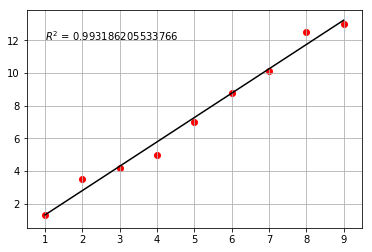

In [5]:
# Graficamos el modelo obtenido junto con los datos considerados
plt.text(1,12,r'$R^2$ = '+str(r2))
plt.plot(x,y,'k')
for p in datos:
    plt.scatter(p[0],p[1],c='r')
plt.grid(True)

<hr />
##### Acabamos de construir con exito nuestro primer modelo de regresion dando como resultado un muy buen coeficiente de correlacion, indicando que los datos describen con bastante confianza un modelo lineal. A continuacion desarrollaremos una version mas sofisticada e introduciremos el uso de simulaciones dinamicas con python y Jupyter.
<hr />

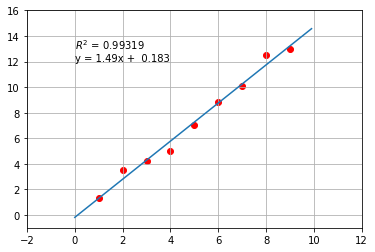

In [6]:
# esta funcion ejecuta el gráfico de regresion para un cierto valor
# de la amplitud de ruido en los datos.
# -> esta forma se escoge para posterior uso dentro del widget interactivo.

##########################################################
# Aqui se recomienda al estudiante que analice de forma  #
# independiente y autónoma el codigo descrito, donde se  # 
# introducen varios elementos nuevos que nos permiten    #
# construir un gráfico de mejor calidad.                 #
##########################################################
def plot_reg(amp=0.0):
    datos = [(1.0, 1.3), (2.0, 3.5), (3.0, 4.2), (4.0, 5.0), (5.0, 7.0),(6.0, 8.8), (7.0, 10.1), (8.0, 12.5), (9.0, 13.0)]
    m = len(datos)
    noise = np.random.normal(0,amp,m)
    datos_noise = []
    
    for i,p in enumerate(datos):
        datos_noise.append((p[0],p[1]+noise[i]))
    model = mincua_linear(datos_noise)
    
    def model_const(model_str,digits):
        concat = []
        for p in model_str.split('*'):
            if '-' in p:
                concat += p.split('-')
            else:
                concat += p.split('+')
        return [concat[0][:digits+2],concat[2][:digits+2]]
    
    z = sym.symbols('z')
    model_st = str(sym.sympify(model(z),z))
    cts = model_const(model_st,4)
    
    r2 = round(R2(datos_noise),5)
    x = np.arange(0.0,10.0,0.1)
    v_model = np.vectorize(model)
    y = v_model(x)
    plt.plot(x,y)
    plt.text(0, 13, r'$R^2$ = '+str(r2), fontsize=10)
    plt.text(0, 12,'y = '+cts[0]+'x + '+cts[1], fontsize=10)
    for p in datos_noise:
        plt.scatter(p[0],p[1],c='r')
    plt.grid(True)
    plt.xlim([-2, 12])
    plt.ylim([-1, 16])
    return None

plot_reg()

##### En el bloque anterior, el parametro "amp" está asociado con la amplitud máxima de un ruido que se agrega a los datos de manera que se pueda verificar la interpretacion del coeficiente de correlacion que se discutió previamente. 

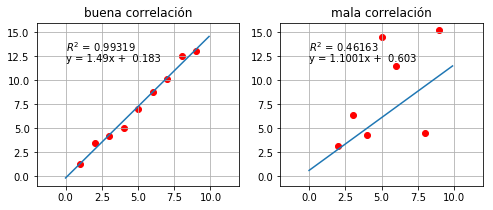

In [7]:
plt.figure(figsize=(8,3))
plt.subplot(121)
plt.title('buena correlación')
plot_reg()
plt.subplot(122)
plt.title('mala correlación')
plot_reg(5.0)

# Simulaciones dinamicas con ipywidgets
<hr />
##### Para poder usar ipywidgets con un servidor montado desde tu pc, debes seguir las siguientes instrucciones de instalación: 
https://ipywidgets.readthedocs.io/en/latest/user_install.html

In [8]:
# importamos la libreria ipywidgets y luego ejecutamos 
# la funcion interactive. Aqui tenemos un ejemplo sencillo 
# de su uso considerando la funcion plot_reg() 
# construida previamente.
from ipywidgets import interactive, fixed
interactive(plot_reg,amp=(0.0,5.0))

interactive(children=(FloatSlider(value=0.0, description='amp', max=5.0), Output()), _dom_classes=('widget-int…